PREDICTIVE ANALYSIS

### Flight Delay Prediction

#### INTRODUCTION
In the dynamic landscape of air travel, the occurrence of flight delays poses significant challenges to both passengers and  airline operators. Addressing this issue requires cutting-edge technology and predictive analytics. This project aims to develop a Flight Delay Prediction system leveraging machine learning algorithms to enhance the accuracy of predicting flight delays and minimize disruptions in air travel.<br><br>

#### PROJECT SCOPE
The scope of this project encompasses the analysis of historical flight data, weather conditions, and other relevant factors to build a robust prediction model. The system will offer real-time predictions, empowering airlines and passengers to make informed decisions and take proactive measures to mitigate the impact of potential delays.
<br><br>

#### ABOUT THE COMPANY
Our company, at the forefront of technological innovation, is dedicated to revolutionizing the aviation industry. With a commitment to enhancing passenger experiences and optimizing airline operations, we specialize in developing cutting-edge solutions. This project aligns with our mission to bring about positive transformations in air travel by providing a reliable
Flight Delay Prediction system. Through the integration of advanced analytics and machine learning, we strive to establish new standards of efficiency and reliability in the aviation sector.

#### PROBLEM STATEMENT
Flight delays lead to inconvenience for passengers, financial losses for airlines, and operational challenges for airports. Existing prediction models often fall short in accuracy due to the complex interplay of multiple variables. This project addresses these limitations by employing advanced machine learning techniques to create a more reliable and precise flight delay prediction system.

#### OBJECTIVES
 - Develop Accurate Prediction Models: Build advanced machine learning models that analyze historical flight data and relevant factors (e.g., weather conditions, air traffic) to predict flight delays with a high level of accuracy.
- Enhance Operational Efficiency: Assist airlines in optimizing their operations by providing early insights into potential delays. This includes optimizing crew schedules, resource allocation, and maintenance planning to minimize disruptions.
- Improve Passenger Experience: Empower passengers with accurate and timely information about potential delays, allowing them to make informed decisions, adjust their plans, and reduce frustration caused by unexpected delays.

#### CONCLUSION
Flight Delay Prediction project is poised to usher in a new era of efficiency and reliability in air travel. By harnessing the power of advanced analytics and machine learning, we aim to mitigate the impact of flight delays, contributing to a smoother and more predictable air travel experience for passengers and greater operational efficiency for airlines. This initiative underscores our commitment to pushing the boundaries of technological innovation for the betterment of the aviation industry.

***You Are Expected To Present A Comprehensive Report At the End of the Week To The Stakeholders***

***DATA DICTIONARY***

1. YEAR: The year of the flight (e.g., 2015).
2. MONTH: The month of the flight (1 to 12).
3. DAY: The day of the month of the flight (1 to 31).
4. DAY_OF_WEEK: The day of the week, represented numerically (1 = Sunday, 2 = Monday, ..., 7 =
Saturday).
5. AIRLINE: The code or abbreviation representing the airline of the flight.
6. FLIGHT_NUMBER: The flight number assigned by the airline.
7. TAIL_NUMBER: The unique aircraft tail number.
8. ORIGIN_AIRPORT: The code or abbreviation for the airport of departure.
9. DESTINATION_AIRPORT: The code or abbreviation for the destination airport.
10. SCHEDULED_DEPARTURE: The scheduled departure time in local time (24-hour format).
11. DEPARTURE_TIME: The actual departure time of the flight in local time (24-hour format).
12. DEPARTURE_DELAY: The delay in departure time, in minutes (negative values indicate early
departure).
13. TAXI_OUT: The time taken, in minutes, for the aircraft to taxi from the gate to the runway.
14. WHEELS_OFF: The time at which the aircraft's wheels leave the ground.
15. SCHEDULED_TIME: The scheduled duration of the flight in minutes.
16. ELAPSED_TIME: The actual elapsed time of the flight in minutes.
17. AIR_TIME: The time the aircraft spends in the air, excluding taxi time.
18. DISTANCE: The distance of the flight in miles.
19. WHEELS_ON: The time at which the aircraft's wheels touch the ground upon arrival.
20. TAXI_IN: The time taken, in minutes, for the aircraft to taxi from the runway to the gate upon arrival.
21. SCHEDULED_ARRIVAL: The scheduled arrival time in local time (24-hour format).
22. ARRIVAL_TIME: The actual arrival time of the flight in local time (24-hour format).

23. ARRIVAL_DELAY: The delay in arrival time, in minutes (negative values indicate early arrival).
24. DIVERTED: A binary indicator (0 or 1) specifying whether the flight was diverted.
25. CANCELLED: A binary indicator (0 or 1) specifying whether the flight was canceled.

Additional Information about the Airline and other abbreviations : airline and airport

Project Focus:
- To enhance the accuracy of predicting flight delays and minimize disruptions in air travel.
- To create a more reliable and precise flight delay prediction system.
- To predict flight delays with a high level of accuracy.

Target: Delay (both arrival and departure)
- What is the 'Total_Delay' count, and percentages of total flight delays?
- What are, and assess the reasons for the delays? AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY,	LATE_AIRCRAFT_DELAY, WEATHER_DELAY


In [1]:
#Import relevant libraries to work with:

# For Data Analysis
import pandas as pd
import numpy as np
import ydata_profiling as yp

# Importing Packages
from ydata_profiling import ProfileReport
from pandas_profiling import ProfileReport

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sb
import missingno as msno
from collections import Counter

from matplotlib import pyplot as plt

# For Machine Learning - Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# For Machine Learning & Evaluation- Unsupervised:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#import silhouette score from sklearn
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, homogeneity_score

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# For Classifier Libraries for Machine Learning:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# For Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# label Encoding
from sklearn.preprocessing import LabelEncoder

# For Date & Time
import datetime

# For chart setting (Seaborn)
sns.set_style('darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_1460\3799006230.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Load the dataset: variables/columns/features

data = pd.read_csv("flights.csv", encoding='UTF-8')
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Profile Report
profile = ProfileReport(data, title="Profiling Report")
profile.to_file('Flight_Report.html')

# Save the profiling report:

report = ProfileReport(data, title = 'Flight Delay Data Profile Report')

report.to_file('Flight_Delay_report.html')

profile = ProfileReport(data)
profile

profile.to_file('Flight_Report.html')

Observation: 
- 6 Categorical Variables: Year, Month, Airline, Diverted, Cancelled, Cancellation_Reason 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

Observation:
- The dataset has 31 variables: float64(16), int64(10), object(5)
- Missing values were detected in the dataset. 
- Delays (Arrival & Departure) are the target variables; the main variable that will be feature engineered and assessed in the dataset (Total_Delay).

In [4]:
# Identify Missing Values:

print(data.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64


<Axes: >

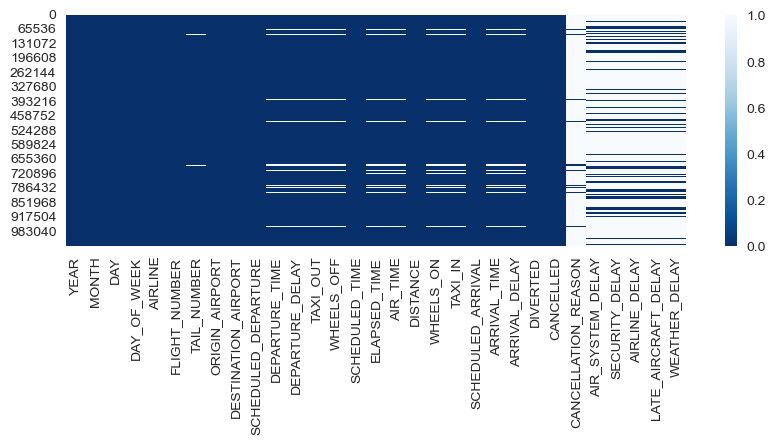

In [5]:
# Visualize missing values 

plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

In [6]:
# read the other Dataset


airline = pd.read_csv('airlines.csv')
airport= pd.read_csv('airports.csv')

In [7]:
# Check for duplicates in the dataset

data.duplicated().sum()

0

Observation: There are no duplicates in the dataset

In [8]:
data.shape

(1048575, 31)

Observation: The data consists of 1,048,575 rows and 31 columns/variables/features.

In [9]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.009060e+06,1.009060e+06,1.008346e+06,1.008346e+06,...,1.048575e+06,1.007279e+06,1.005504e+06,1.048575e+06,1.048575e+06,228528.000000,228528.000000,228528.000000,228528.000000,228528.000000
mean,2015.0,1.694297e+00,1.382097e+01,3.953196e+00,2.256759e+03,1.322632e+03,1.333705e+03,1.133485e+01,1.665380e+01,1.357382e+03,...,1.504820e+03,1.492204e+03,7.612191e+00,2.426150e-03,3.864960e-02,13.692554,0.057328,18.203577,22.921458,3.545277
std,0.0,7.051508e-01,8.725656e+00,1.999436e+00,1.799166e+03,4.707748e+02,4.827415e+02,3.922372e+01,1.007006e+01,4.830351e+02,...,4.865613e+02,5.071090e+02,4.209367e+01,4.919620e-02,1.927585e-01,25.524897,1.779647,46.323146,41.888498,23.611555
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.550000e+02,9.200000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,...,1.120000e+03,1.115000e+03,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000e+00,1.300000e+01,4.000000e+00,1.725000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.400000e+01,1.342000e+03,...,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000e+00,2.100000e+01,6.000000e+00,3.485000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.900000e+01,1.745000e+03,...,1.915000e+03,1.917000e+03,1.200000e+01,0.000000e+00,0.000000e+00,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [10]:
data.nunique()

YEAR                      1
MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6522
TAIL_NUMBER            4522
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1236
DEPARTURE_TIME         1434
DEPARTURE_DELAY         861
TAXI_OUT                179
WHEELS_OFF             1433
SCHEDULED_TIME          460
ELAPSED_TIME            685
AIR_TIME                650
DISTANCE               1271
WHEELS_ON              1440
TAXI_IN                 179
SCHEDULED_ARRIVAL      1353
ARRIVAL_TIME           1440
ARRIVAL_DELAY           883
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        395
SECURITY_DELAY           87
AIRLINE_DELAY           675
LATE_AIRCRAFT_DELAY     510
WEATHER_DELAY           466
dtype: int64

In [11]:
# Identify Missing Values
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64

Observation:  Missing values for CANCELLATION_REASON is 96% of the dataset; hence that variable will be dropped.

In [12]:
#merge the dataset together as one
data = pd.merge(data, airline, left_on=data['AIRLINE'], right_on=airline['IATA_CODE'], how='inner')  # 'inner' join
data.head()

,key_0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,AS,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,AS,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
2,AS,2015,1,1,4,AS,108,N309AS,ANC,SEA,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
3,AS,2015,1,1,4,AS,122,N413AS,ANC,PDX,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
4,AS,2015,1,1,4,AS,130,N457AS,FAI,SEA,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [13]:
# Perform Feature Engineering: 

# Feature Engineering

# Since the Flight Delays are the main focus, we will create a new column:
#Total_Delay = DEPARTURE_DELAY + ARRIVAL_DELAY 

data['Total_Delay'] = data['DEPARTURE_DELAY'] + data['ARRIVAL_DELAY']


#Encode the delayed flight in Binary

def delay(x):
    if x > 0:
        return 1
    else:
        return 0

data['delay'] = data['Total_Delay'].apply(delay)

#Extracting the Dataset for the Delayed Flight

data_Delayed=data[data['delay'] == 1]
data_Delayed

,key_0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y,Total_Delay,delay
19,AS,2015,1,1,4,AS,699,N532AS,GEG,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,1.0,1
33,AS,2015,1,1,4,AS,548,N306AS,BLI,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,6.0,1
37,AS,2015,1,1,4,AS,662,N302AS,SEA,DFW,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,3.0,1
38,AS,2015,1,1,4,AS,709,N769AS,SLC,SJC,...,NaN,0.0,0.0,0.0,0.0,50.0,AS,Alaska Airlines Inc.,117.0,1
43,AS,2015,1,1,4,AS,17,N419AS,EWR,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048554,VX,2015,3,10,2,VX,108,N844VA,LAX,IAD,...,NaN,NaN,NaN,NaN,NaN,NaN,VX,Virgin America,11.0,1
1048561,VX,2015,3,10,2,VX,204,N621VA,SFO,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,VX,Virgin America,5.0,1
1048564,VX,2015,3,10,2,VX,935,N524VA,LAX,SFO,...,NaN,126.0,0.0,0.0,0.0,0.0,VX,Virgin America,237.0,1
1048565,VX,2015,3,10,2,VX,22,N852VA,SFO,JFK,...,NaN,NaN,NaN,NaN,NaN,NaN,VX,Virgin America,2.0,1


In [14]:
data.head()

,key_0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y,Total_Delay,delay
0,AS,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,-33.0,0
1,AS,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,-22.0,0
2,AS,2015,1,1,4,AS,108,N309AS,ANC,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,-18.0,0
3,AS,2015,1,1,4,AS,122,N413AS,ANC,PDX,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,-22.0,0
4,AS,2015,1,1,4,AS,130,N457AS,FAI,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,-11.0,0


In [15]:
# Total Number of Delayed Flight recorded in the Database (negatives are on-time flights)

TotalFlighttDelay = len(data[data['Total_Delay'] > 0])

print(f'The Total Number of Delayed flight recorded is: {TotalFlighttDelay}')

The Total Number of Delayed flight recorded is: 430071


In [16]:
# Total Flight recorded in the Database

TotalFlights = len(data)

print(f'The Total flight recorded during the period of observation is: {TotalFlights}')

The Total flight recorded during the period of observation is: 1048575


In [17]:
# Percentage of Flight Delays recorded

FlightDelayPercent = round(((TotalFlighttDelay/TotalFlights) * 100), 2)

print (f'The percentage of Flight Delay recorded is: {FlightDelayPercent} %')

The percentage of Flight Delay recorded is: 41.01 %


In [18]:
# Convert the Shedule Departure Time to a DateTime Data type

data['Time'] = data['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4) #change time to 0000 formart with zfill(4)

data['Scheduled_Departure_Time'] = pd.to_datetime(data[['YEAR', 'MONTH', 'DAY', 'Time']].astype(str).agg(' '.join, axis=1), format='%Y %m %d %H%M')

In [19]:
data[['YEAR', 'MONTH', 'DAY', 'Time','SCHEDULED_DEPARTURE','Scheduled_Departure_Time']].head(3)

,YEAR,MONTH,DAY,Time,SCHEDULED_DEPARTURE,Scheduled_Departure_Time
0,2015,1,1,0005,5,2015-01-01 00:05:00
1,2015,1,1,0025,25,2015-01-01 00:25:00
2,2015,1,1,0045,45,2015-01-01 00:45:00


In [20]:
data['Scheduled_Departure_Time'] = pd.to_datetime(data['Scheduled_Departure_Time'])

# Extract the day of the week in 'Monday', 'Tuesday' format
data['DayOfWeek'] = data['Scheduled_Departure_Time'].dt.strftime('%A')

# Extract and format the month
data['Month'] = data['Scheduled_Departure_Time'].dt.strftime('%B')

data[['Scheduled_Departure_Time', 'DAY','DAY_OF_WEEK','DayOfWeek', 'Month', 'YEAR']]

,Scheduled_Departure_Time,DAY,DAY_OF_WEEK,DayOfWeek,Month,YEAR
0,2015-01-01 00:05:00,1,4,Thursday,January,2015
1,2015-01-01 00:25:00,1,4,Thursday,January,2015
2,2015-01-01 00:45:00,1,4,Thursday,January,2015
3,2015-01-01 00:50:00,1,4,Thursday,January,2015
4,2015-01-01 01:15:00,1,4,Thursday,January,2015
...,...,...,...,...,...,...
1048570,2015-03-10 09:25:00,10,2,Tuesday,March,2015
1048571,2015-03-10 09:45:00,10,2,Tuesday,March,2015
1048572,2015-03-10 10:00:00,10,2,Tuesday,March,2015
1048573,2015-03-10 10:00:00,10,2,Tuesday,March,2015


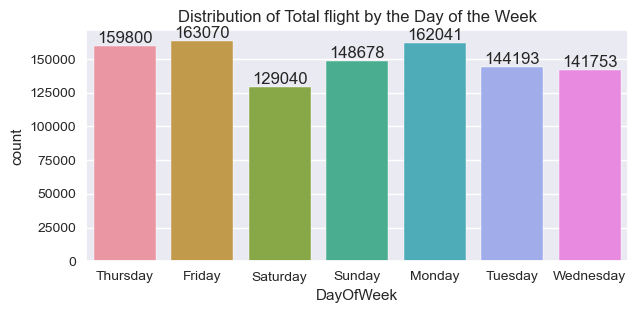

In [21]:
label=data['DayOfWeek'].value_counts()

plt.figure(figsize = (7, 3))
br = sns.countplot(x = 'DayOfWeek', data=data)
br.bar_label(container=br.containers[0], label=label.values)
plt.title('Distribution of Total flight by the Day of the Week');

In [22]:
data_Delayed=data[data['delay'] == 1]
data_Delayed.head()

,key_0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y,Total_Delay,delay,Time,Scheduled_Departure_Time,DayOfWeek,Month
19,AS,2015,1,1,4,AS,699,N532AS,GEG,SEA,...,NaN,NaN,AS,Alaska Airlines Inc.,1.0,1,0600,2015-01-01 06:00:00,Thursday,January
33,AS,2015,1,1,4,AS,548,N306AS,BLI,SEA,...,NaN,NaN,AS,Alaska Airlines Inc.,6.0,1,0640,2015-01-01 06:40:00,Thursday,January
37,AS,2015,1,1,4,AS,662,N302AS,SEA,DFW,...,NaN,NaN,AS,Alaska Airlines Inc.,3.0,1,0640,2015-01-01 06:40:00,Thursday,January
38,AS,2015,1,1,4,AS,709,N769AS,SLC,SJC,...,0.0,50.0,AS,Alaska Airlines Inc.,117.0,1,0640,2015-01-01 06:40:00,Thursday,January
43,AS,2015,1,1,4,AS,17,N419AS,EWR,SEA,...,NaN,NaN,AS,Alaska Airlines Inc.,5.0,1,0700,2015-01-01 07:00:00,Thursday,January


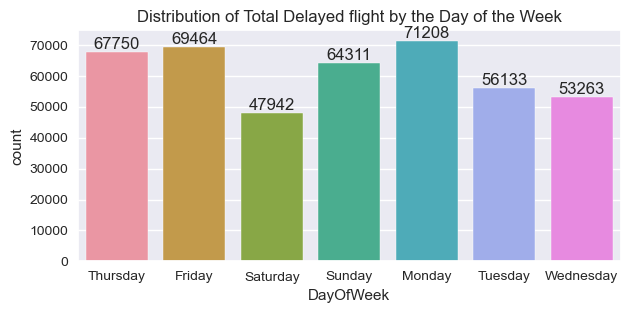

In [23]:
label=data_Delayed['DayOfWeek'].value_counts()

plt.figure(figsize = (7, 3))
br = sns.countplot(x = 'DayOfWeek', data=data_Delayed)
br.bar_label(container=br.containers[0], label=label.values)
plt.title('Distribution of Total Delayed flight by the Day of the Week');

#### Observation:
- Highest number of flight were recorded on Friday but the highest amount of Delayed Flight was on Monday

- The more the flights on a day, the more delays were recorded. 

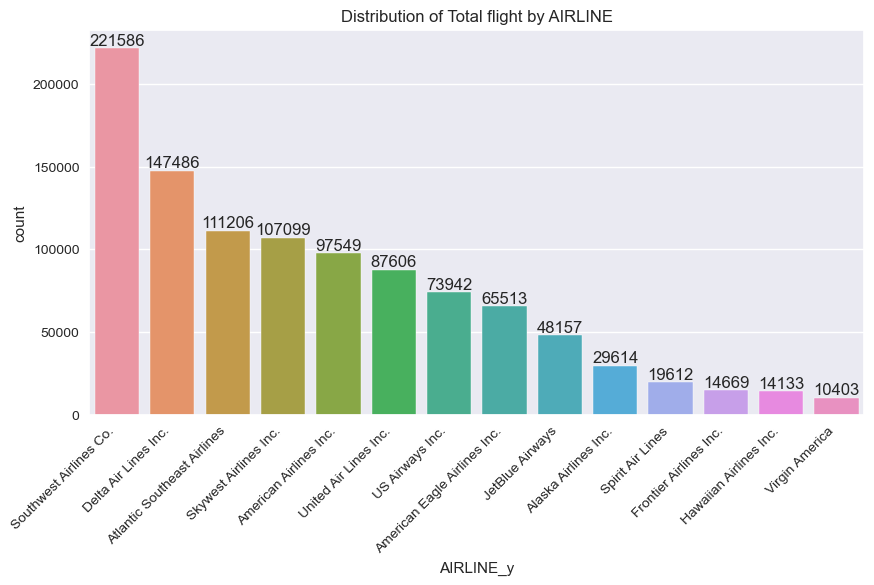

In [24]:
label=data['AIRLINE_y'].value_counts().nlargest(14).index

plt.figure(figsize = (10, 5))
br = sns.countplot(x = 'AIRLINE_y', data=data, order=label)
br.bar_label(container=br.containers[0], label=label.values)


# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Total flight by AIRLINE');

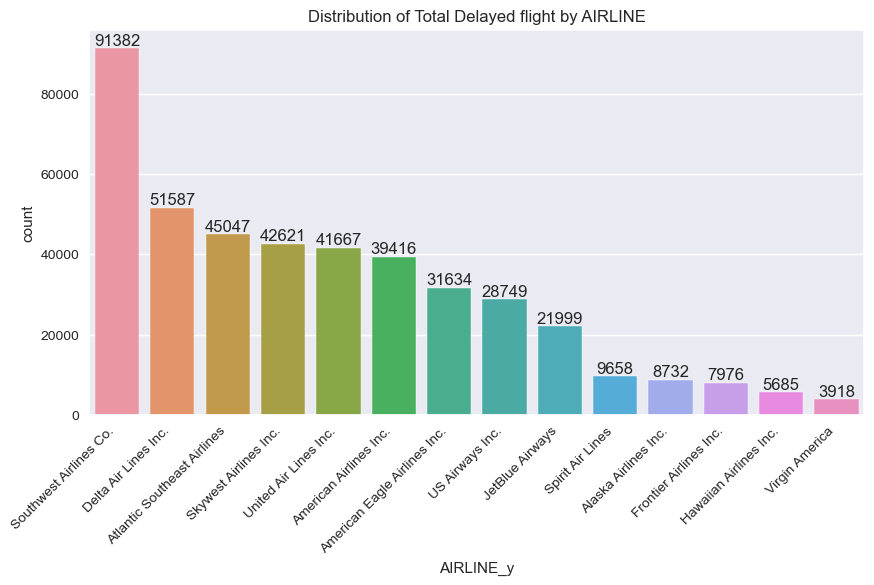

In [25]:
label=data_Delayed['AIRLINE_y'].value_counts().nlargest(14).index

plt.figure(figsize = (10, 5))
br = sns.countplot(x = 'AIRLINE_y', data=data_Delayed, order=label)
br.bar_label(container=br.containers[0], label=label.values)


# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Total Delayed flight by AIRLINE');

#### Observation:
- Highest number of flight were recorded by Southwest Airlines Co. same as the highest amount of delays 

In [26]:
#Estimating the percentage of Delayed flight per total flight from each Airline

Airline_flight = data.groupby('AIRLINE_x')
Airline_delay = data_Delayed.groupby('AIRLINE_x')

Total_flight=Airline_flight['AIRLINE_x'].size()
Total_delay = Airline_delay['AIRLINE_x'].size()

airline = pd.DataFrame({
    'Total Flight': Total_flight,
    'Delayed Flight':Total_delay,
})

airline['Airline'] = label.sort_values()

airline['Delay_Flight %'] = round(((airline['Delayed Flight'] / airline['Total Flight']) * 100),2)
airline

,Total Flight,Delayed Flight,Airline,Delay_Flight %
AIRLINE_x,,,,
AA,97549,39416,Alaska Airlines Inc.,40.41
AS,29614,8732,American Airlines Inc.,29.49
B6,48157,21999,American Eagle Airlines Inc.,45.68
DL,147486,51587,Atlantic Southeast Airlines,34.98
EV,111206,45047,Delta Air Lines Inc.,40.51
F9,14669,7976,Frontier Airlines Inc.,54.37
HA,14133,5685,Hawaiian Airlines Inc.,40.23
MQ,65513,31634,JetBlue Airways,48.29
NK,19612,9658,Skywest Airlines Inc.,49.25


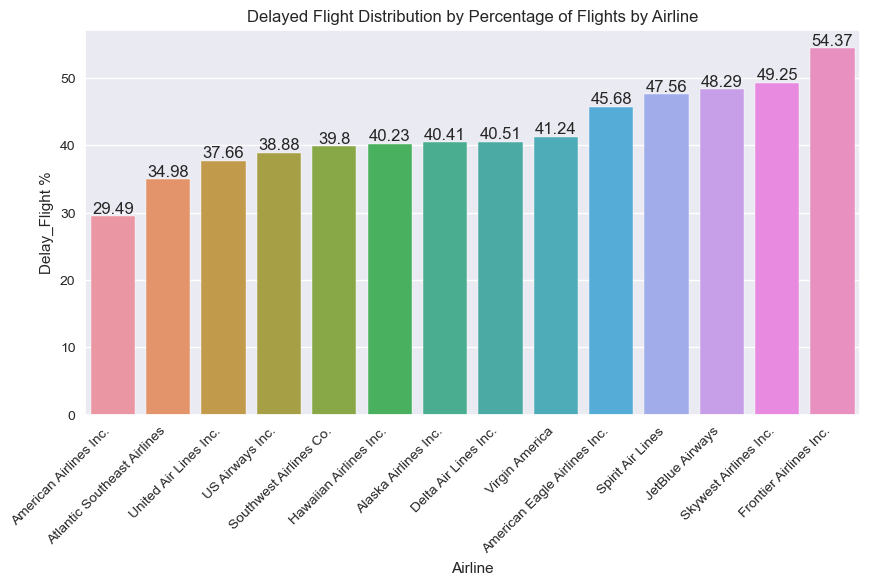

In [27]:
#Create a bar plot
plt.figure(figsize=(10,5))
br=sns.barplot(x='Airline', y='Delay_Flight %', data = airline, order=airline.sort_values('Delay_Flight %')['Airline'])
br.bar_label(container=br.containers[0], label=airline['Delay_Flight %'].values)

#sns.barplot(x='Category', y='Value', data=df, order=df.sort_values('Value')['Category'])

#Rotating the x-axis label for better vissualization
plt.xticks(rotation=45, ha='right')
plt.title('Delayed Flight Distribution by Percentage of Flights by Airline')
plt.show()

#### Observation:
- Highest number of flight were recorded by Southwest Airlines Co. but Frontier Airlines Inc has the highest percentage of delayed flight per flight operated.

### Delayed Caused by Technical/Operational Issues

In [29]:
DelayedFlight = data_Delayed

In [30]:
# Delayed flight Caused by Identified Technical/Operational Issues

data_op=DelayedFlight[DelayedFlight['AIR_SYSTEM_DELAY'].notna()]
data_op.shape

(228509, 40)

#### Observation:
228,509 Flight were delayed by Operation/Technical Issues

In [31]:
# Delayed flight Caused by Other Factors

data_of=data_Delayed[data_Delayed['AIR_SYSTEM_DELAY'].isna()]
data_of.shape

(201562, 40)

#### Observation:
201,562 Flight were delayed by Other factor not Technical nor Operation related

In [32]:
# Counting the amount of delay caused by Technical Issues
# Create a new DataFrame: "counts_dict" to assess total delays.

count_asd = DelayedFlight['AIR_SYSTEM_DELAY'][DelayedFlight['AIR_SYSTEM_DELAY'] > 0].count()
count_sd = DelayedFlight['SECURITY_DELAY'][DelayedFlight['SECURITY_DELAY'] > 0].count()
count_ald = DelayedFlight['AIRLINE_DELAY'][DelayedFlight['AIRLINE_DELAY'] > 0].count()
count_lad = DelayedFlight['LATE_AIRCRAFT_DELAY'][DelayedFlight['LATE_AIRCRAFT_DELAY'] > 0].count()
count_wd = DelayedFlight['WEATHER_DELAY'][DelayedFlight['WEATHER_DELAY'] > 0].count()
count_of = DelayedFlight['AIR_SYSTEM_DELAY'].isna().sum()

# Dictionary to store the counts
counts_dict = {
    'Delay_Type': ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','Other Factor'],
    'Count_of_Occurence': [count_asd, count_sd, count_ald,count_lad,count_wd, count_of]
}

# DataFrame from the dictionary
counts_data = pd.DataFrame(counts_dict)
counts_data

,Delay_Type,Count_of_Occurence
0,AIR_SYSTEM_DELAY,131115
1,SECURITY_DELAY,605
2,AIRLINE_DELAY,122239
3,LATE_AIRCRAFT_DELAY,120928
4,WEATHER_DELAY,18038
5,Other Factor,201562


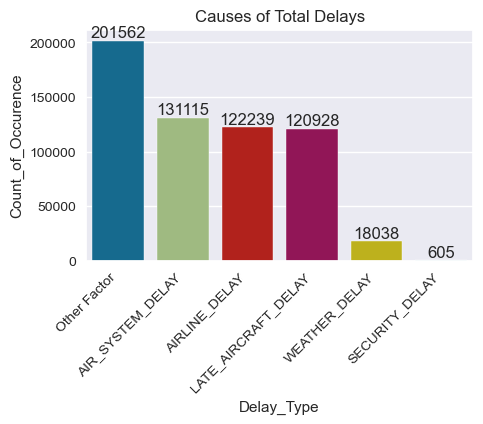

In [33]:
#Exploring the distribution of the clusters (of Delays)

plt.figure(figsize=(5,3))

br= sns.barplot(data=counts_data, y= 'Count_of_Occurence', x = 'Delay_Type', order=counts_data.sort_values('Count_of_Occurence', ascending = False)['Delay_Type'])

br.bar_label(container=br.containers[0], label=counts_data.Count_of_Occurence)

plt.xticks(rotation=45, ha='right')
plt.title('Causes of Total Delays');

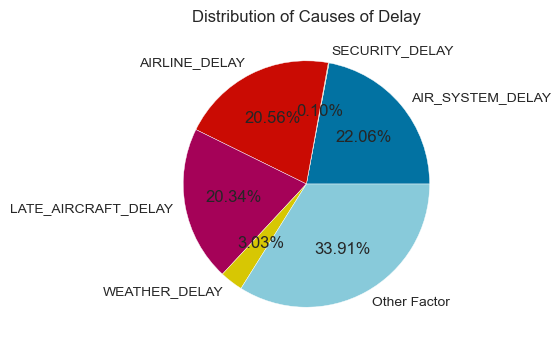

In [34]:
fig,ax=plt.subplots(figsize=(6,4))
ax.pie(counts_data['Count_of_Occurence'], labels=counts_data['Delay_Type'], autopct=lambda p:f'{p:.2f}%');
ax.set_title('Distribution of Causes of Delay')
plt.show()

**Observation:** Other Factors of delays represents 33.91%, AIR_SYSTEM_DELAY is 22.06% and AIRLINE_DELAY is 20.56%.

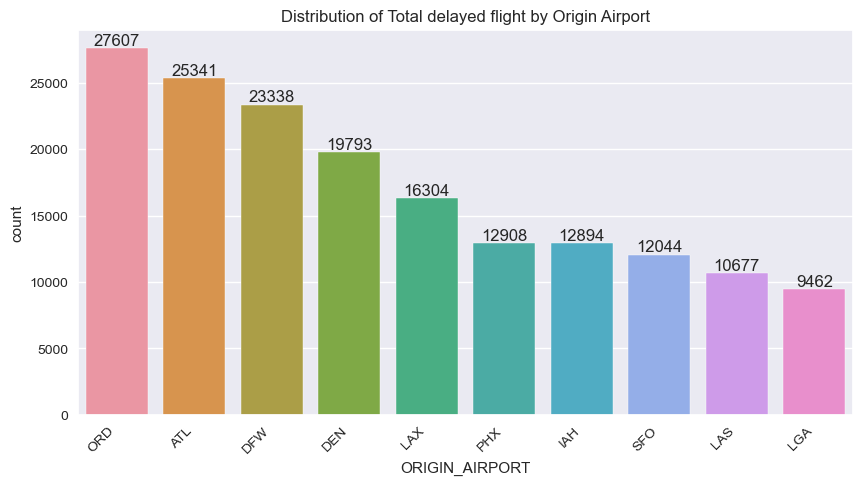

In [35]:
# Distribution of Total delayed flight by Origin Airport Not Caused by Technical/Operational Delay

label=data_Delayed['ORIGIN_AIRPORT'].value_counts().nlargest(10).index

plt.figure(figsize = (10, 5))
br = sns.countplot(x = 'ORIGIN_AIRPORT', data=data_Delayed, order=label)
br.bar_label(container=br.containers[0], label=label.values)


# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Total delayed flight by Origin Airport');

In [36]:
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [37]:
data_of.drop('key_0', axis = 1, inplace = True)

In [38]:
df_ofa = pd.merge(data_of, airport, left_on=data_of['ORIGIN_AIRPORT'], right_on=airport['IATA_CODE'], how='inner')  # 'inner' join
df_ofa

,key_0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,Scheduled_Departure_Time,DayOfWeek,Month,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,GEG,2015,1,1,4,AS,699,N532AS,GEG,SEA,...,2015-01-01 06:00:00,Thursday,January,GEG,Spokane International Airport,Spokane,WA,USA,47.61986,-117.53384
1,GEG,2015,1,1,4,AS,693,N703AS,GEG,SEA,...,2015-01-01 14:05:00,Thursday,January,GEG,Spokane International Airport,Spokane,WA,USA,47.61986,-117.53384
2,GEG,2015,1,2,5,AS,697,N614AS,GEG,SEA,...,2015-01-02 17:45:00,Friday,January,GEG,Spokane International Airport,Spokane,WA,USA,47.61986,-117.53384
3,GEG,2015,1,3,6,AS,699,N403AS,GEG,SEA,...,2015-01-03 06:00:00,Saturday,January,GEG,Spokane International Airport,Spokane,WA,USA,47.61986,-117.53384
4,GEG,2015,1,3,6,AS,693,N795AS,GEG,SEA,...,2015-01-03 14:05:00,Saturday,January,GEG,Spokane International Airport,Spokane,WA,USA,47.61986,-117.53384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201557,ISP,2015,3,8,7,WN,275,N8323C,ISP,PBI,...,2015-03-08 15:35:00,Sunday,March,ISP,Long Island MacArthur Airport,Islip,NY,USA,40.79524,-73.10021
201558,ISP,2015,3,9,1,WN,4368,N628SW,ISP,MCO,...,2015-03-09 13:50:00,Monday,March,ISP,Long Island MacArthur Airport,Islip,NY,USA,40.79524,-73.10021
201559,ISP,2015,3,9,1,WN,749,N7729A,ISP,RSW,...,2015-03-09 14:55:00,Monday,March,ISP,Long Island MacArthur Airport,Islip,NY,USA,40.79524,-73.10021
201560,ISP,2015,3,9,1,WN,275,N8653A,ISP,PBI,...,2015-03-09 15:35:00,Monday,March,ISP,Long Island MacArthur Airport,Islip,NY,USA,40.79524,-73.10021


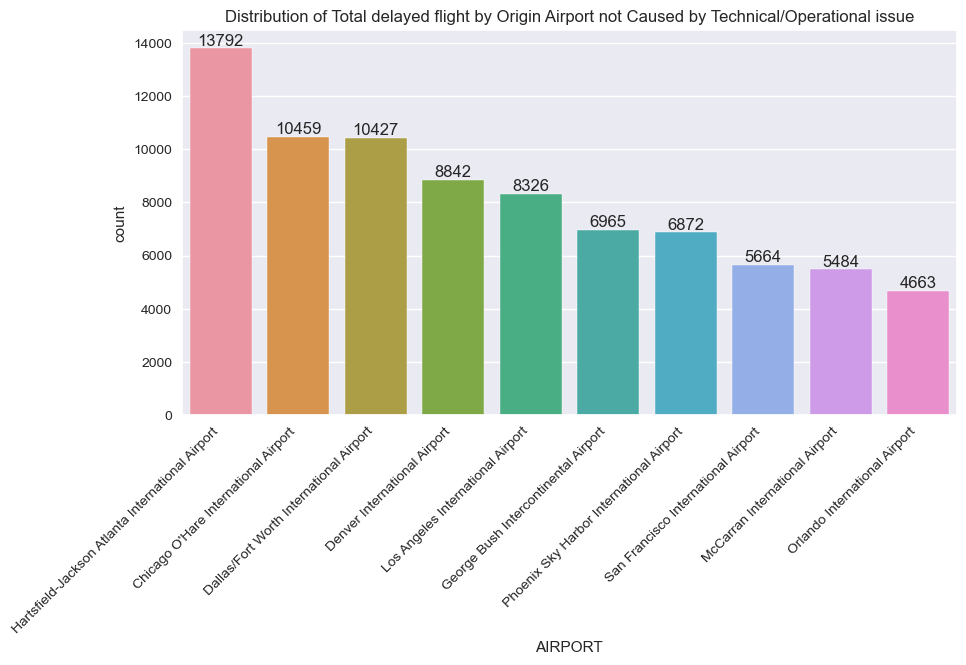

In [39]:
label=df_ofa['AIRPORT'].value_counts().nlargest(10).index

plt.figure(figsize = (10, 5))
br = sns.countplot(x = 'AIRPORT', data=df_ofa, order=label)
br.bar_label(container=br.containers[0], label=label.values)


# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Total delayed flight by Origin Airport not Caused by Technical/Operational issue');

#### Observation 

Hartsfield-Jackson Atlanta operated the most amount of flight in the dataset (66599) and the highest number of flight whose delays are not related to Technical or Operational issues, but Chicago O'Hare Int. Airport has the highest amount of delayed flight (27607), and Guam International Airport (GUM) has the highest percentage of delayed flight at 30.43%

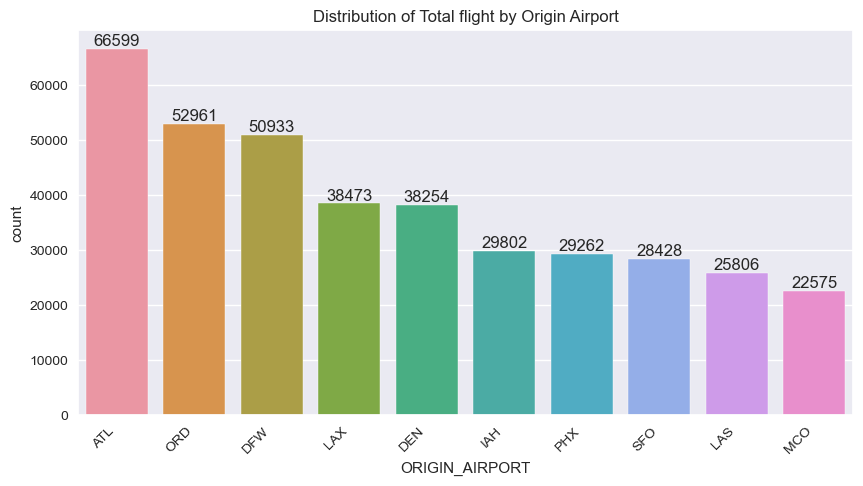

In [40]:
label=data['ORIGIN_AIRPORT'].value_counts().nlargest(10).index

plt.figure(figsize = (10, 5))
br = sns.countplot(x = 'ORIGIN_AIRPORT', data=data, order=label)
br.bar_label(container=br.containers[0], label=label.values)


# Rotating x-axis label for beter visualization
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Total flight by Origin Airport');

In [41]:
#Estimating the percentage of Delayed flight per total flight from each Airport

Airport_origin = data.groupby('ORIGIN_AIRPORT')
Airport_delay = df_ofa.groupby('ORIGIN_AIRPORT')

Total_flight=Airport_origin['ORIGIN_AIRPORT'].size()
Total_delay = Airport_delay['ORIGIN_AIRPORT'].size()

Origin_Airport_del = pd.DataFrame({
    'Total Flight': Total_flight,
    'Delayed Flight':Total_delay,
})

Origin_Airport_del['Delay_Flight %'] = round(((Origin_Airport_del['Delayed Flight'] / Origin_Airport_del['Total Flight']) * 100),2)


sorted_df = Origin_Airport_del.sort_values(by='Delay_Flight %', ascending=False)
sorted_df.to_excel('Airport Delay.xlsx', index=True)
sorted_df.head(10)

,Total Flight,Delayed Flight,Delay_Flight %
ORIGIN_AIRPORT,,,
GUM,69,21.0,30.43
PPG,21,6.0,28.57
BGR,22,6.0,27.27
OAK,7967,2024.0,25.40
DAL,11432,2858.0,25.00
GGG,125,31.0,24.80
ISP,849,208.0,24.50
CIU,127,31.0,24.41
OGG,4228,1027.0,24.29


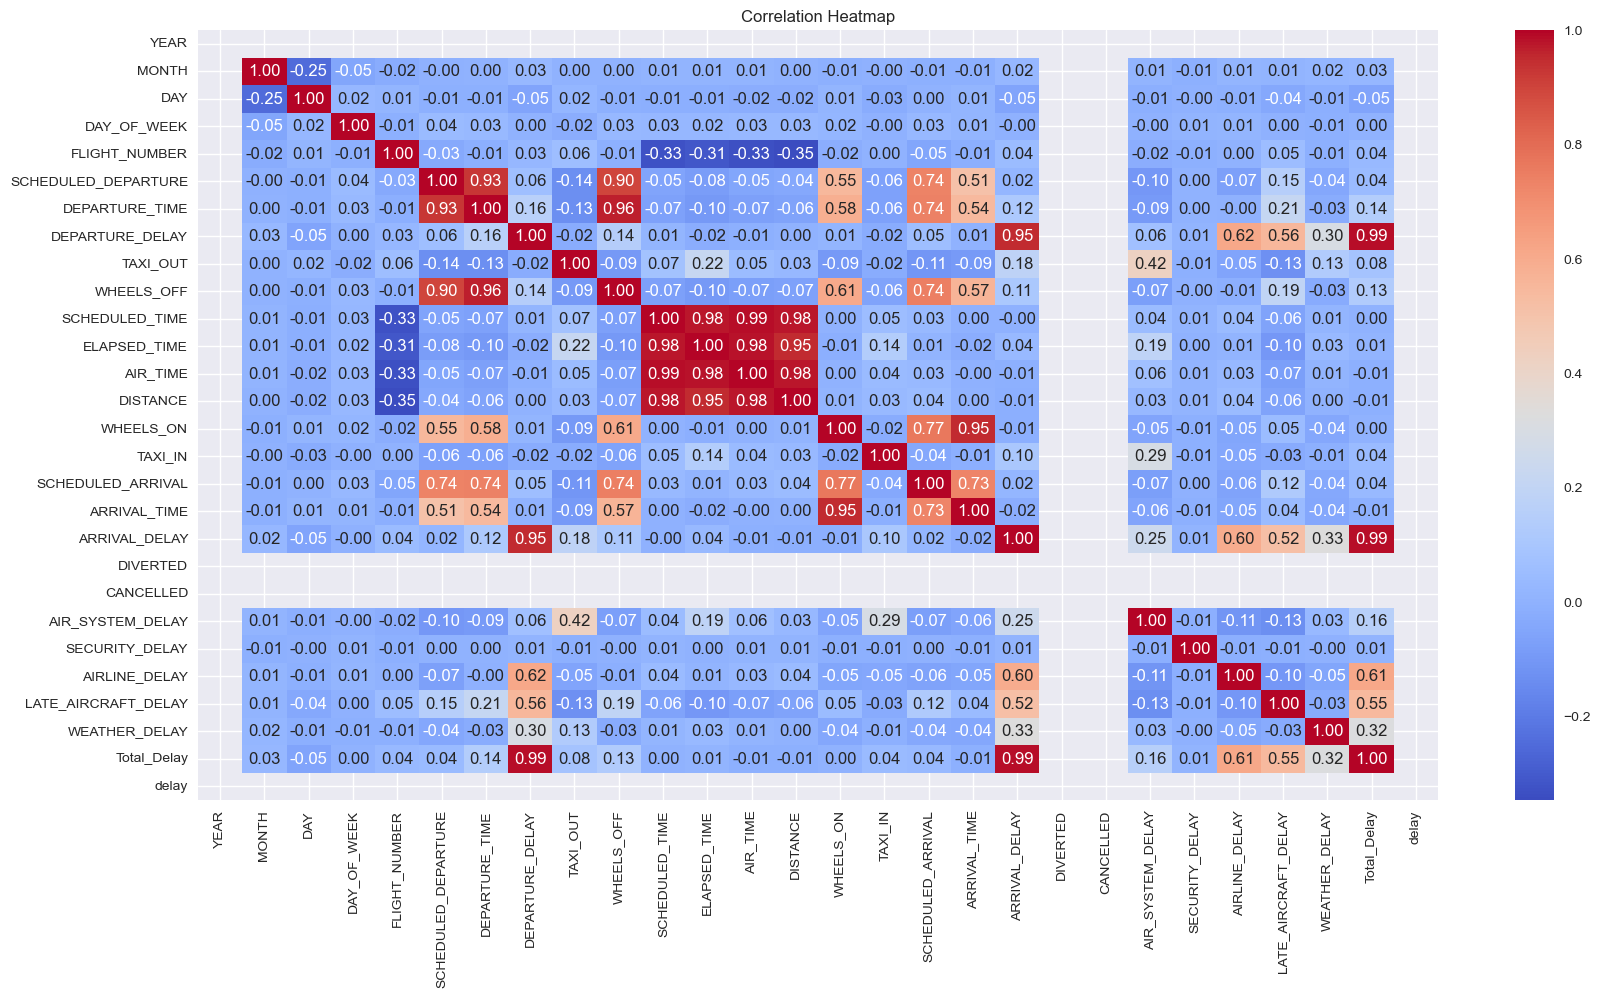

In [42]:
# Correlation Heatmap
plt.figure(figsize=(20,10))

corr_matrix = DelayedFlight.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Observation: The is a positive correlation between 'Total_Delay' and 'AIR_SYSTEM_DELAY', 'Total_Delay' and 'AIRLINE_DELAY', 'Total_Delay' and 'LATE_AIRCRAFT_DELAY', and 'Total_Delay' and 'WEATHER_DELAY'.

#### Numerical
##### Drop irrelevant columns- threshold 0.10

DEPARTURE_DELAY
WHEELS_OFF
ARRIVAL_DELAY
AIR_SYSTEM_DELAY
AIRLINE_DELAY
LATE_ARRIVAL_DELAY
WEATHER_DELAY
AIRLINE
ORIGIN_AIRPORT
DESTINATION_AIRPORT


### Machine Learning

In [62]:
# Machine Learning

#Create a Feature: Delay

#Target - Delay

#'Delay' = 1 or 'Not Delay' = 0

#Encode the delayed flight in Binary

def delay(x):
    if x > 0:
        return 1
    else:
        return 0

data['delay'] = data['Total_Delay'].apply(delay)

In [63]:
data.head()

,key_0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y,Total_Delay,delay,Time,Scheduled_Departure_Time,DayOfWeek,Month
0,AS,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,NaN,NaN,AS,Alaska Airlines Inc.,-33.0,0,0005,2015-01-01 00:05:00,Thursday,January
1,AS,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,NaN,NaN,AS,Alaska Airlines Inc.,-22.0,0,0025,2015-01-01 00:25:00,Thursday,January
2,AS,2015,1,1,4,AS,108,N309AS,ANC,SEA,...,NaN,NaN,AS,Alaska Airlines Inc.,-18.0,0,0045,2015-01-01 00:45:00,Thursday,January
3,AS,2015,1,1,4,AS,122,N413AS,ANC,PDX,...,NaN,NaN,AS,Alaska Airlines Inc.,-22.0,0,0050,2015-01-01 00:50:00,Thursday,January
4,AS,2015,1,1,4,AS,130,N457AS,FAI,SEA,...,NaN,NaN,AS,Alaska Airlines Inc.,-11.0,0,0115,2015-01-01 01:15:00,Thursday,January


In [65]:
# Select data that are directly related to the Target Variable: Delay, that will now be named as 'data_x'

data_x = data[['AIRLINE_x','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','WHEELS_OFF','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

label=data['delay']

In [66]:
data_x

,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,WHEELS_OFF,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,AS,ANC,SEA,-11.0,15.0,-22.0,NaN,NaN,NaN,NaN
1,AS,SEA,ANC,-1.0,35.0,-21.0,NaN,NaN,NaN,NaN
2,AS,ANC,SEA,-4.0,58.0,-14.0,NaN,NaN,NaN,NaN
3,AS,ANC,PDX,-4.0,57.0,-18.0,NaN,NaN,NaN,NaN
4,AS,FAI,SEA,-8.0,132.0,-3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1048570,VX,SAN,SFO,79.0,1058.0,74.0,74.0,0.0,0.0,0.0
1048571,VX,JFK,LAS,-5.0,1004.0,-2.0,NaN,NaN,NaN,NaN
1048572,VX,IAD,SFO,-3.0,1008.0,-25.0,NaN,NaN,NaN,NaN
1048573,VX,SFO,SAN,-7.0,1004.0,-15.0,NaN,NaN,NaN,NaN


In [67]:
label

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    0
1048572    0
1048573    0
1048574    0
Name: delay, Length: 1048575, dtype: int64

In [68]:
data_x.shape

(1048575, 10)

In [69]:
label.shape

(1048575,)

In [70]:
# label Encoding
from sklearn.preprocessing import LabelEncoder

# Method Initialization
encoder = LabelEncoder()

# Looping for columns except survived

for c in data_x.columns:
    if (data_x[c].dtype=='object'):
        data_x[c] = encoder.fit_transform(data_x[c])
    else:
         data_x[c] = data_x[c]
            
data_x.head()

,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,WHEELS_OFF,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,15,271,-11.0,15.0,-22.0,NaN,NaN,NaN,NaN
1,1,271,15,-1.0,35.0,-21.0,NaN,NaN,NaN,NaN
2,1,15,271,-4.0,58.0,-14.0,NaN,NaN,NaN,NaN
3,1,15,230,-4.0,57.0,-18.0,NaN,NaN,NaN,NaN
4,1,105,271,-8.0,132.0,-3.0,NaN,NaN,NaN,NaN


In [71]:
# Check Missing Values in Delay data: 'data_x'
data_x.isna().sum()

AIRLINE_x                   0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
DEPARTURE_DELAY         39515
WHEELS_OFF              40229
ARRIVAL_DELAY           43071
AIR_SYSTEM_DELAY       820047
AIRLINE_DELAY          820047
LATE_AIRCRAFT_DELAY    820047
WEATHER_DELAY          820047
dtype: int64

In [72]:
# Replace Null Values with zeroes

data_x.fillna(0, inplace = True)

In [73]:
data_x.dtypes

AIRLINE_x                int32
ORIGIN_AIRPORT           int32
DESTINATION_AIRPORT      int32
DEPARTURE_DELAY        float64
WHEELS_OFF             float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [74]:
# Normalization of Data

# Dealing with the variables with outliers in the dataset

scaler = MinMaxScaler()

In [75]:
#Scale the entire dataset:

data_x = scaler.fit_transform(data_x)
data_x

array([[0.07692308, 0.0477707 , 0.86305732, ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.86305732, 0.0477707 , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.0477707 , 0.86305732, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92307692, 0.45859873, 0.86624204, ..., 0.        , 0.        ,
        0.        ],
       [0.92307692, 0.86624204, 0.8343949 , ..., 0.        , 0.        ,
        0.        ],
       [0.92307692, 0.54458599, 0.35350318, ..., 0.        , 0.        ,
        0.        ]])

Model selection, training, and validation:
a) Train and test at least 3 supervised learning models

MACHINE LEARNING

In [76]:
# Split the dataset into Training and Testing sets: 
# x = Questions, y = Answers

X_train, x_test, y_train, y_test = train_test_split(data_x, label, test_size=0.2, random_state=42)

In [77]:
X_train

array([[0.76923077, 0.06369427, 0.32802548, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.81210191, 0.26751592, ..., 0.        , 0.        ,
        0.        ],
       [0.30769231, 0.83757962, 0.2866242 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.84615385, 0.67197452, 0.20382166, ..., 0.        , 0.        ,
        0.        ],
       [0.30769231, 0.09235669, 0.2866242 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.63057325, 0.70700637, ..., 0.        , 0.        ,
        0.        ]])

In [78]:
x_test

array([[0.53846154, 0.70700637, 0.24522293, ..., 0.        , 0.        ,
        0.00607639],
       [1.        , 0.60509554, 0.19745223, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.05732484, 0.60509554, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.06369427, 0.25159236, ..., 0.        , 0.        ,
        0.        ],
       [0.69230769, 0.67197452, 0.39490446, ..., 0.        , 0.        ,
        0.        ],
       [0.15384615, 0.59872611, 0.51273885, ..., 0.        , 0.        ,
        0.        ]])

In [79]:
y_train

408561    0
70143     1
708782    0
572694    0
774181    1
         ..
259178    0
365838    1
131932    1
671155    0
121958    0
Name: delay, Length: 838860, dtype: int64

In [80]:
y_test

781974    1
937737    0
907828    0
784628    1
662460    1
         ..
673443    0
656736    1
858501    0
617079    0
487559    1
Name: delay, Length: 209715, dtype: int64

Model Evaluation: 
- a) Analyze the results of the trained model 
- b) What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?

In [81]:
# lOGISTICS REGRESSION - LOGREG

logreg = LogisticRegression()

logreg.fit(X_train, y_train)  #Machine Learning aspect

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.9395465274300837
Precision: 0.9921913849875681
Recall: 0.8592078770032937
F1-score: 0.9209236181280642
AUC-ROC: 0.9272572981151984


Observation:

In [82]:
# Classification_Report
print("classification report for the Random Classifier model \n",classification_report(y_test,ly_pred))

classification report for the Random Classifier model 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    123794
           1       0.99      0.86      0.92     85921

    accuracy                           0.94    209715
   macro avg       0.95      0.93      0.94    209715
weighted avg       0.94      0.94      0.94    209715



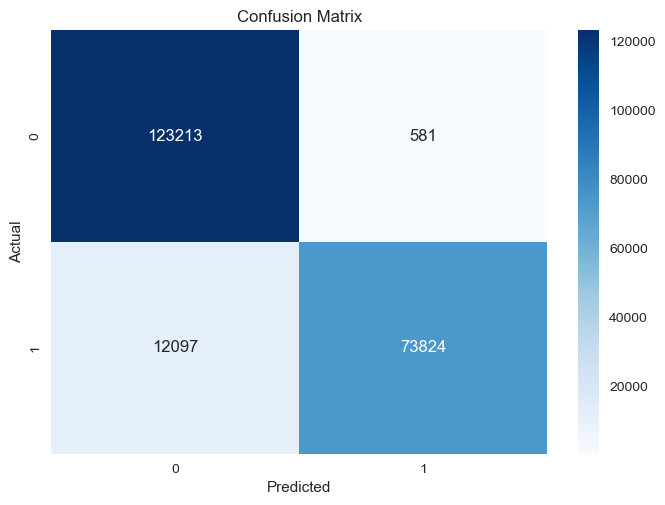

In [83]:
# Confusion Matrix - Logistics Confusion Matrix (lcm)

lcm = confusion_matrix(y_test, ly_pred)

# Visualize confusion matrix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show();

Observations: 
- 73,824 cases of True Positives (TP), where the actual label is positive (Delay - Yes), and it was correctly predicted by the model as positive.
- 123,213 cases of True Negatives (TN), where the actual label is negative (Not Delay - No), and it was correctly predicted as negative.
- False Positive (FP) Type 1 Error - 581 cases incorrectly predicted as positive, where the actual label is negative ((Not Delay - No), but the model predicted it as positive. These were false alarms.
- False Negative (FN) Type 2 Error - 12,097 cases incorrectly predicted as negative, where the actual label is positive (Delay - Yes), but was predicted by the model as negative. These were missed cases. 

These errors of false alarms and missed cases must be reduced as they can very costly to the company.
Failing to correctly identify a flight that may be likely to be delayed can result in loss of revenue for the company; a high cost of False Negatives (FN). 

In [84]:
# Random Forest Classifier - rfc

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(x_test)

print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))


Random Forest Model
Accuracy: 0.9991607658012064
Precision: 0.9981872479867995
Recall: 0.9997672280350555
F1-score: 0.9989766132877462
AUC-ROC: 0.9992535350153144


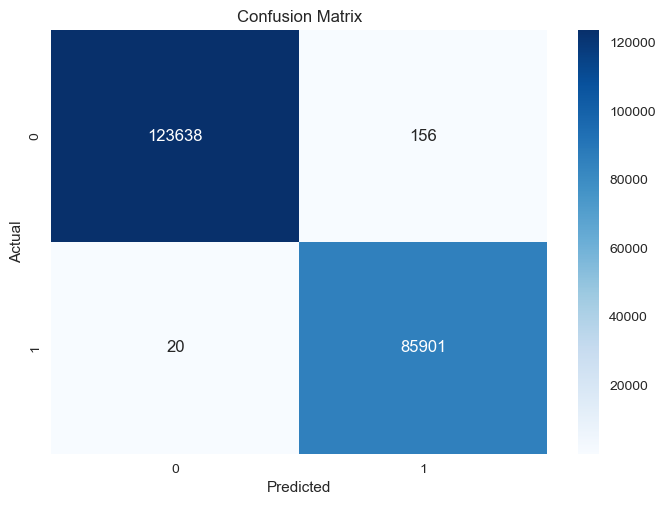

In [85]:
# Create a Confussion Matrix:

rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the Confusion Matrix

sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show();

Observation: 
- 85,901 cases of True Positives (TP), where the actual label is positive (Delay - Yes), and it was correctly predicted by the model as positive.
- 123,638 cases of True Negatives (TN), where the actual label is negative (No Delay - No), and it was correctly predicted as negative.
- False Positive (FP) Type 1 Error - 156 cases incorrectly predicted as positive, where the actual label is negative (No  Delay  No), but the model predicted it as positive. These were false alarms.
- False Negative (FN) Type 11 Error - 20 cases incorrectly predicted as negative, where the actual label is positive (Delay - Yes), but was predicted by the model as negative. These were missed cases. These errors of false alarms and missed cases must be reduced.

In [49]:
# KNeighborsClassifier(), 'K-Nearest Neighbors'],        
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
kfy_pred = knc.predict(x_test)

print("K-Nearest Neighbors Model")
print("Accuracy:", accuracy_score(y_test, kfy_pred))
print("Precision:", precision_score(y_test, kfy_pred))
print("Recall:", recall_score(y_test, kfy_pred))
print("F1-score:", f1_score(y_test, kfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, kfy_pred))

K-Nearest Neighbors Model
Accuracy: 0.9272059700069142
Precision: 0.9482642463994712
Recall: 0.8695028847834956
F1-score: 0.9071772545967507
AUC-ROC: 0.9183295573045949


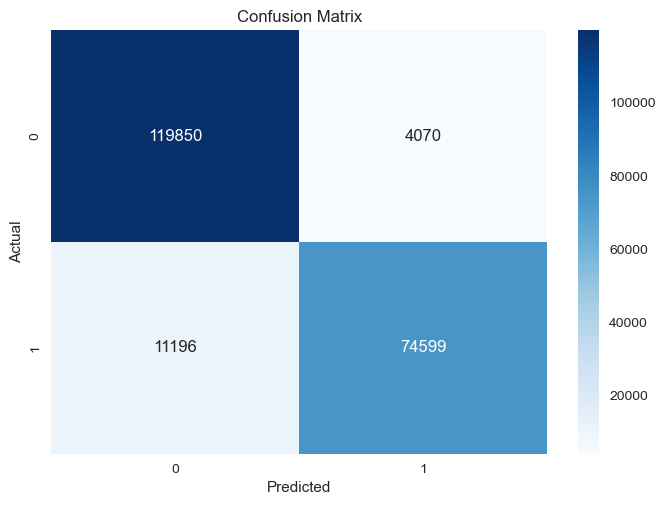

In [50]:
# Create a Confussion Matrix:

kcm = confusion_matrix(y_test, kfy_pred)

# Visualize the Confusion Matrix

sns.heatmap(kcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show();

In [53]:
# XGBClassifier(), 'XGB Classifier',

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgy_pred = xgb.predict(x_test)

print("XGB Classifier Model")
print("Accuracy:", accuracy_score(y_test, xgy_pred))
print("Precision:", precision_score(y_test, xgy_pred))
print("Recall:", recall_score(y_test, xgy_pred))
print("F1-score:", f1_score(y_test, xgy_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgy_pred))

XGB Classifier Model
Accuracy: 0.9991369239205589
Precision: 0.9982076767300575
Recall: 0.9996852963459409
F1-score: 0.9989459401224107
AUC-ROC: 0.9992212795480513


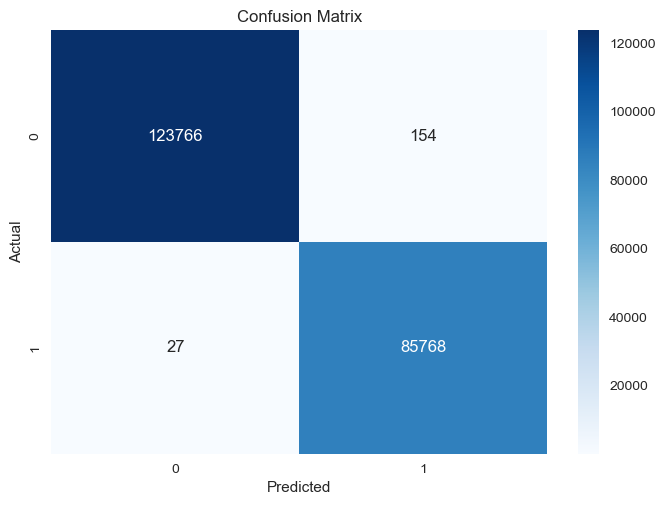

In [54]:
# Create a Confussion Matrix:

xcm = confusion_matrix(y_test, xgy_pred)

# Visualize the Confusion Matrix

sns.heatmap(xcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show();

#### Observations:

**Day-wise Flight and Delay Distribution:** Fridays witness the highest number of recorded flights, whereas Mondays experience the highest frequency of delays. Moreover, there exists a correlation between the volume of flights on a given day and the incidence of delays, with a proportional increase in delays corresponding to an increase in flight volume.

**Delay Causes:** Among the documented delays, Air-System-Delay, Airline-Delay, and Late-Aircraft-Delay collectively contribute to 62% of all delays. Specifically, Air-System-Delay accounts for 22%, Airline-Delay and Late-Aircraft-Delay each contribute 20%. Security-related delays represent a minor fraction at 0.1%, while approximately 33.9% of delays stem from other unspecified factors within the dataset.

**Airline Performance:** Southwest Airlines Co. emerges as the leader in both total flights operated and delayed flights recorded. However, Frontier Airlines Inc. exhibits the highest percentage ratio of delayed flights to total flights operated, standing at 54.37%. In contrast, Southwest Airlines Co. experiences delays in 39.8% of its flights, whereas American Airlines boasts the lowest delay percentage at 29.5%.

**Airport Performance:** Hartsfield-Jackson Atlanta International Airport handles the highest volume of flights and concurrently records the most delayed flights. However, the delay percentage per flight operated at this airport stands at 20.7%. In contrast, despite Guam International Airport managing a significantly smaller number of flights (61), it reports a delay percentage ratio of 30.43%.

**Recommendations:**

**Day-Specific Strategies:** Given the higher incidence of delays on Sundays despite lower overall flight volumes compared to Thursdays, airlines should implement targeted strategies to address potential bottlenecks and operational challenges on Sundays. This might involve optimizing staffing levels, enhancing ground operations, and prioritizing maintenance schedules on Sundays to minimize delays.

**Root Cause Analysis and Mitigation:** Understanding the primary causes of delays, such as Air-System-Delay, Airline-Delay, and Late-Aircraft-Delay, enables airlines to focus resources on addressing these specific issues. Implementing proactive maintenance schedules, investing in infrastructure improvements, and optimizing flight scheduling algorithms can help mitigate the impact of these delay factors.

**Airline Performance Optimization:** Airlines should analyze their delay patterns and compare them against industry benchmarks to identify areas for improvement. This may involve optimizing fleet utilization, enhancing crew scheduling algorithms, and investing in technology solutions to streamline operations and reduce delays. Additionally, benchmarking against peers, such as Frontier Airlines Inc. and American Airlines, can provide valuable insights into best practices and areas for improvement.

**Airport Collaboration and Performance Improvement:** Collaboration between airlines and airports is critical to improving overall operational efficiency and reducing delays. Airports can invest in infrastructure upgrades, implement advanced air traffic management systems, and optimize ground handling processes to minimize delays. Additionally, airlines and airports should collaborate on data-sharing initiatives to enable real-time monitoring and decision-making, facilitating proactive response to potential delays.

**Customer Communication and Service Recovery:** Effective communication with passengers is essential during delay situations to minimize inconvenience and enhance customer satisfaction. Airlines should implement robust communication channels, such as mobile apps, SMS notifications, and social media updates, to keep passengers informed about delays and provide alternative travel options. Additionally, airlines should develop proactive service recovery strategies, such as offering compensation, rebooking options, and amenities, to mitigate the impact of delays on passengers.

**Customer Experience:**

**Proactive Communication:** Implement proactive communication channels to keep passengers informed about delays, especially on high-delay days like Sundays. Provide real-time updates via SMS, mobile apps, and email, offering transparency and managing passenger expectations.

**Flexible Rebooking Options:** Offer flexible rebooking options for passengers affected by delays, allowing them to easily reschedule their flights without penalties. Provide self-service tools and dedicated customer support channels to facilitate hassle-free rebooking processes.

**Priority Services for Affected Passengers:** Prioritize assistance and services for passengers affected by delays, such as expedited security screening, access to airport lounges, gound transportation for hotel stays where relevant, and complimentary refreshments. Demonstrate empathy and attentiveness to passengers' needs to enhance their experience during delays.

**Clear and Transparent Policies:** Ensure clarity and transparency in delay-related policies, including compensation procedures, passenger rights, and entitlements. Communicate these policies effectively to passengers, empowering them to make informed decisions and seek assistance when needed.

**Post-Flight Feedback Mechanisms:** Implement post-flight feedback mechanisms to gather insights from passengers about their delay experience. Use surveys, online reviews, and social media monitoring to capture feedback and identify areas for improvement in customer service and operational processes.

**Operational Efficiency:**

**Root Cause Analysis:** Conduct detailed root cause analysis of delay factors, such as Air-System-Delay, Airline-Delay, and Late-Aircraft-Delay. Identify common trends, recurring issues, and areas for improvement to implement targeted interventions and reduce delay occurrences.

**Predictive Analytics for Scheduling:** Utilize predictive analytics and historical data to optimize flight scheduling and crew allocation. Identify peak delay periods and allocate resources accordingly, adjusting staffing levels and flight frequencies to minimize the impact of delays on operational efficiency.

**Collaborative Approach with Airports:** Foster collaborative partnerships with airports and air traffic control authorities to optimize ground operations and reduce turnaround times. Coordinate closely on slot allocations, gate assignments, and runway utilization to streamline processes and minimize delays.

**Continuous Improvement Initiatives:** Implement continuous improvement initiatives across operational workflows, leveraging feedback from frontline staff and stakeholders. Encourage innovation and problem-solving to identify efficiency gains, eliminate bottlenecks, and enhance overall performance.

**Investment in Technology:** Invest in technology solutions, such as integrated airline management systems and real-time monitoring tools, to enhance operational visibility and control. Leverage automation and digitalization to streamline processes, improve data accuracy, and facilitate proactive decision-making.

### Model Evaluation 

In our analysis of flight delay prediction models:

**LOGISTICS REGRESSION MODEL**  gave a promising results. With 73,824 true positives and 123,213 true negatives, our model demonstrates strong predictive capabilities. However, we also identified areas for improvement, notably 581 false positives and 12,097 false negatives. These errors represent missed opportunities and potential disruptions to our operations. To enhance our predictive accuracy and mitigate risks, we propose refining our algorithms, adjusting thresholds, and incorporating real-time data updates. By continuously monitoring and refining our model, we can optimize resource allocation, improve passenger experience, and bolster operational efficiency.






On comparison between the **Logistic Regression** and **Random Forest Classifier models** it reveals notable differences in their predictive performance:

**Logistic Regression**:

True Positives (TP): 73,824
True Negatives (TN): 123,213
False Positives (FP): 581
False Negatives (FN): 12,097

**Random Forest Classifier model**:

True Positives (TP): 85,901
True Negatives (TN): 123,638
False Positives (FP): 156
False Negatives (FN): 20

While the **Random Forest Classifier model** demonstrates higher true positive and true negative rates compared to the **Logistic Regression**, it also exhibits a lower count of false positives and false negatives. Specifically, the **Random Forest Classifier model** reduces false alarms (FP) from 581 to 156 and missed cases (FN) from 12,097 to 20. These improvements signify enhanced accuracy and reliability in predicting flight delays, underscoring the importance of continual model refinement and optimization to minimize errors and enhance operational efficiency.

### RECOMMENDATION

For the business, it's crucial to adopt the **Random Forest Classifier model** due to its superior predictive performance, with higher true positives and true negatives and reduced false alarms and missed cases compared to the **Logistic Regression**. By implementing the **Random Forest Classifier model**, we can enhance our ability to accurately predict flight delays, leading to improved operational efficiency, better resource allocation, and enhanced passenger experience. Continual monitoring and refinement of the model will be essential to maintain its effectiveness over time.